The bar graph shows how much the run time differs between  the two.

Obviously, paper proxy has more runtime.


New Proxy runtime for N=3: 0.032605648040771484
Paper Proxy runtime for N=3: 0.004086732864379883
New Proxy runtime for N=4: 0.015239953994750977
Paper Proxy runtime for N=4: 0.004617214202880859
New Proxy runtime for N=5: 0.009324789047241211
Paper Proxy runtime for N=5: 0.009556055068969727
New Proxy runtime for N=6: 0.004081249237060547
Paper Proxy runtime for N=6: 0.013564825057983398
New Proxy runtime for N=7: 0.00943136215209961
Paper Proxy runtime for N=7: 0.07629752159118652
New Proxy runtime for N=8: 0.007678508758544922
Paper Proxy runtime for N=8: 0.08388566970825195
New Proxy runtime for N=9: 0.008746623992919922
Paper Proxy runtime for N=9: 0.08489775657653809
New Proxy runtime for N=10: 0.015035152435302734
Paper Proxy runtime for N=10: 0.34174108505249023


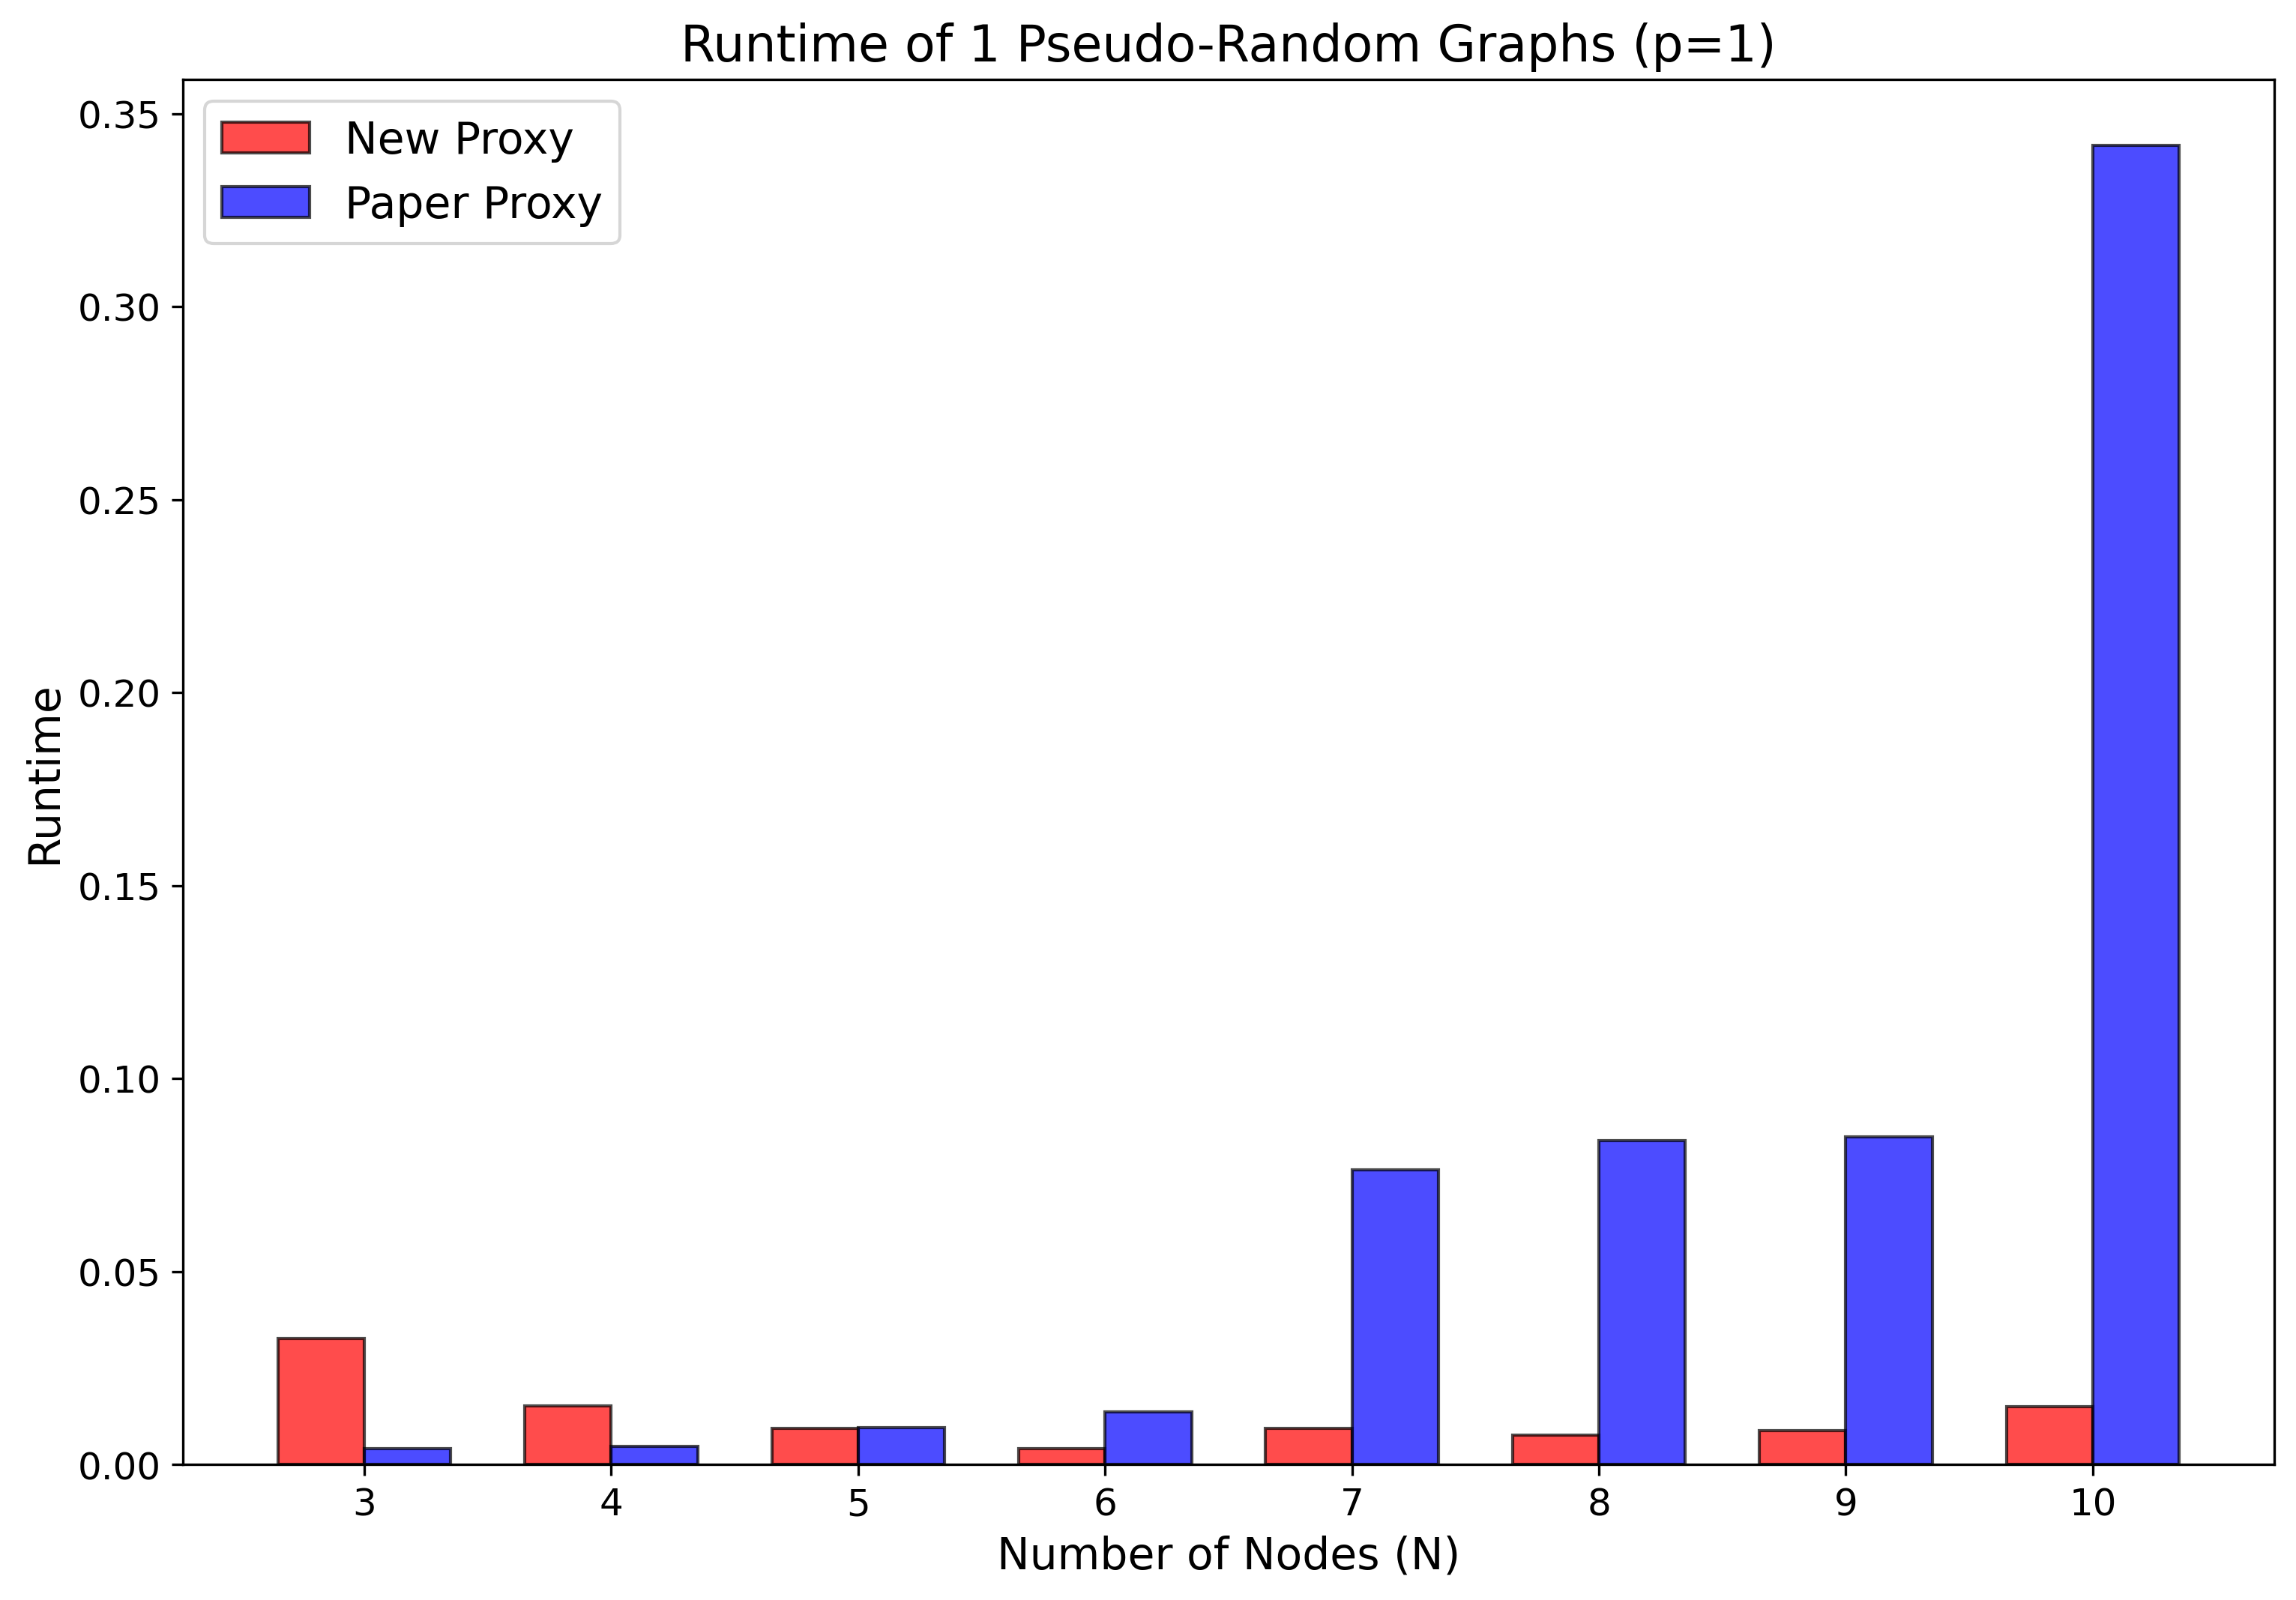

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import qokit.maxcut as mc
from QAOA_simulator import QAOA_run, get_simulator
import QAOA_proxy as qp
import QAOA_paper_proxy as qpp
import os  # データ保存に必要

# QAOAの層数
p = 1

runtime_new_proxy = []
runtime_paper_proxy = []

# 試行回数
T = 1

# 保存先ディレクトリを指定
save_dir = f"data_for_graphs_runtime_P={p}_T={T}"
os.makedirs(save_dir, exist_ok=True)

# Nを5から10まで変化させて計算
for N in range(3, 11):
    runtime_new_proxy_i = []
    runtime_paper_proxy_i = []

    for i in range(T):
        G = nx.erdos_renyi_graph(N, 0.5)
        ising_model = mc.get_maxcut_terms(G)
        sim = get_simulator(N, ising_model)

        init_gamma, init_beta = np.full((2, p), 0.1)

        result = qp.QAOA_proxy_run(G.number_of_edges(), N, p, init_gamma, init_beta)
        # `result` の中に `runtime` が存在するか確認
        if "runtime" in result:
            runtime = result["runtime"]
            # 結果をリストに追加
            runtime_new_proxy_i.append(runtime)
            print(f"New Proxy runtime for N={N}: {runtime}")
        else:
            print(f"Warning: 'runtime' not found for New Proxy with N={N}")

        np.save(f"{save_dir}/data_for_runtime_new_proxy_N={N}_G{i}.npy", runtime)

        result = qpp.QAOA_paper_proxy_run(G.number_of_edges(), N, p, init_gamma, init_beta)
        # `result` の中に `runtime` が存在するか確認
        if "runtime" in result:
            runtime = result["runtime"]
            # 結果をリストに追加
            runtime_paper_proxy_i.append(runtime)
            print(f"Paper Proxy runtime for N={N}: {runtime}")
        else:
            print(f"Warning: 'runtime' not found for Paper Proxy with N={N}")

        np.save(f"{save_dir}/data_for_runtime_paper_proxy_N={N}_G{i}.npy", runtime)

    # 各Nに対しての平均を計算
    if runtime_new_proxy_i:
        avg_runtime_new_proxy = np.mean(runtime_new_proxy_i)
        runtime_new_proxy.append(avg_runtime_new_proxy)
    if runtime_paper_proxy_i:
        avg_runtime_paper_proxy = np.mean(runtime_paper_proxy_i)
        runtime_paper_proxy.append(avg_runtime_paper_proxy)


# 棒グラフの作成
bar_width = 0.35  # バーの幅
index = np.arange(3, 11)  # x軸のインデックス

# runtime_new_proxy と runtime_paper_proxy のサイズが index のサイズと一致するように調整
if len(runtime_new_proxy) != len(index):
    runtime_new_proxy = runtime_new_proxy[:len(index)]
if len(runtime_paper_proxy) != len(index):
    runtime_paper_proxy = runtime_paper_proxy[:len(index)]

# グラフのサイズと解像度の設定（figsizeとdpiを調整）
plt.figure(figsize=(12, 8), dpi=300)

# 新しいプロキシの棒グラフ（枠を黒色に設定）
plt.bar(index - bar_width / 2, runtime_new_proxy, bar_width, color='red', alpha=0.7, label='New Proxy', edgecolor='black')

# 論文プロキシの棒グラフ（枠を黒色に設定）
plt.bar(index + bar_width / 2, runtime_paper_proxy, bar_width, color='blue', alpha=0.7, label='Paper Proxy', edgecolor='black')

# グラフの設定
plt.xlabel('Number of Nodes (N)', fontsize=14)  # 横軸のラベル
plt.ylabel('Runtime', fontsize=14)  # 縦軸のラベル
plt.title(f'Runtime of {T} Pseudo-Random Graphs (p={p})', fontsize=16)  # 題名
plt.xticks(index, fontsize=12)  # x軸の目盛りのサイズ
plt.yticks(fontsize=12)  # y軸の目盛りのサイズ
plt.legend(prop={'size': 14})

# グラフをファイルとして保存
plt.savefig(f"{save_dir}/Runtime of {T} Pseudo-Random Graphs (P={p}).png", format='png', bbox_inches='tight')

# グラフの表示
plt.show()


     

New Proxy runtime for N=3: 0.08297610282897949
Paper Proxy runtime for N=3: 0.3086986541748047
New Proxy runtime for N=4: 0.12864279747009277
Paper Proxy runtime for N=4: 0.6027531623840332
New Proxy runtime for N=5: 0.18787622451782227
Paper Proxy runtime for N=5: 1.4837980270385742
New Proxy runtime for N=6: 0.1228950023651123
Paper Proxy runtime for N=6: 1.556312084197998
New Proxy runtime for N=7: 0.24188518524169922
Paper Proxy runtime for N=7: 3.9733707904815674
New Proxy runtime for N=8: 0.2157270908355713
Paper Proxy runtime for N=8: 8.522531032562256
New Proxy runtime for N=9: 0.7138204574584961
Paper Proxy runtime for N=9: 11.529670715332031
New Proxy runtime for N=10: 1.777029275894165
Paper Proxy runtime for N=10: 34.642253398895264


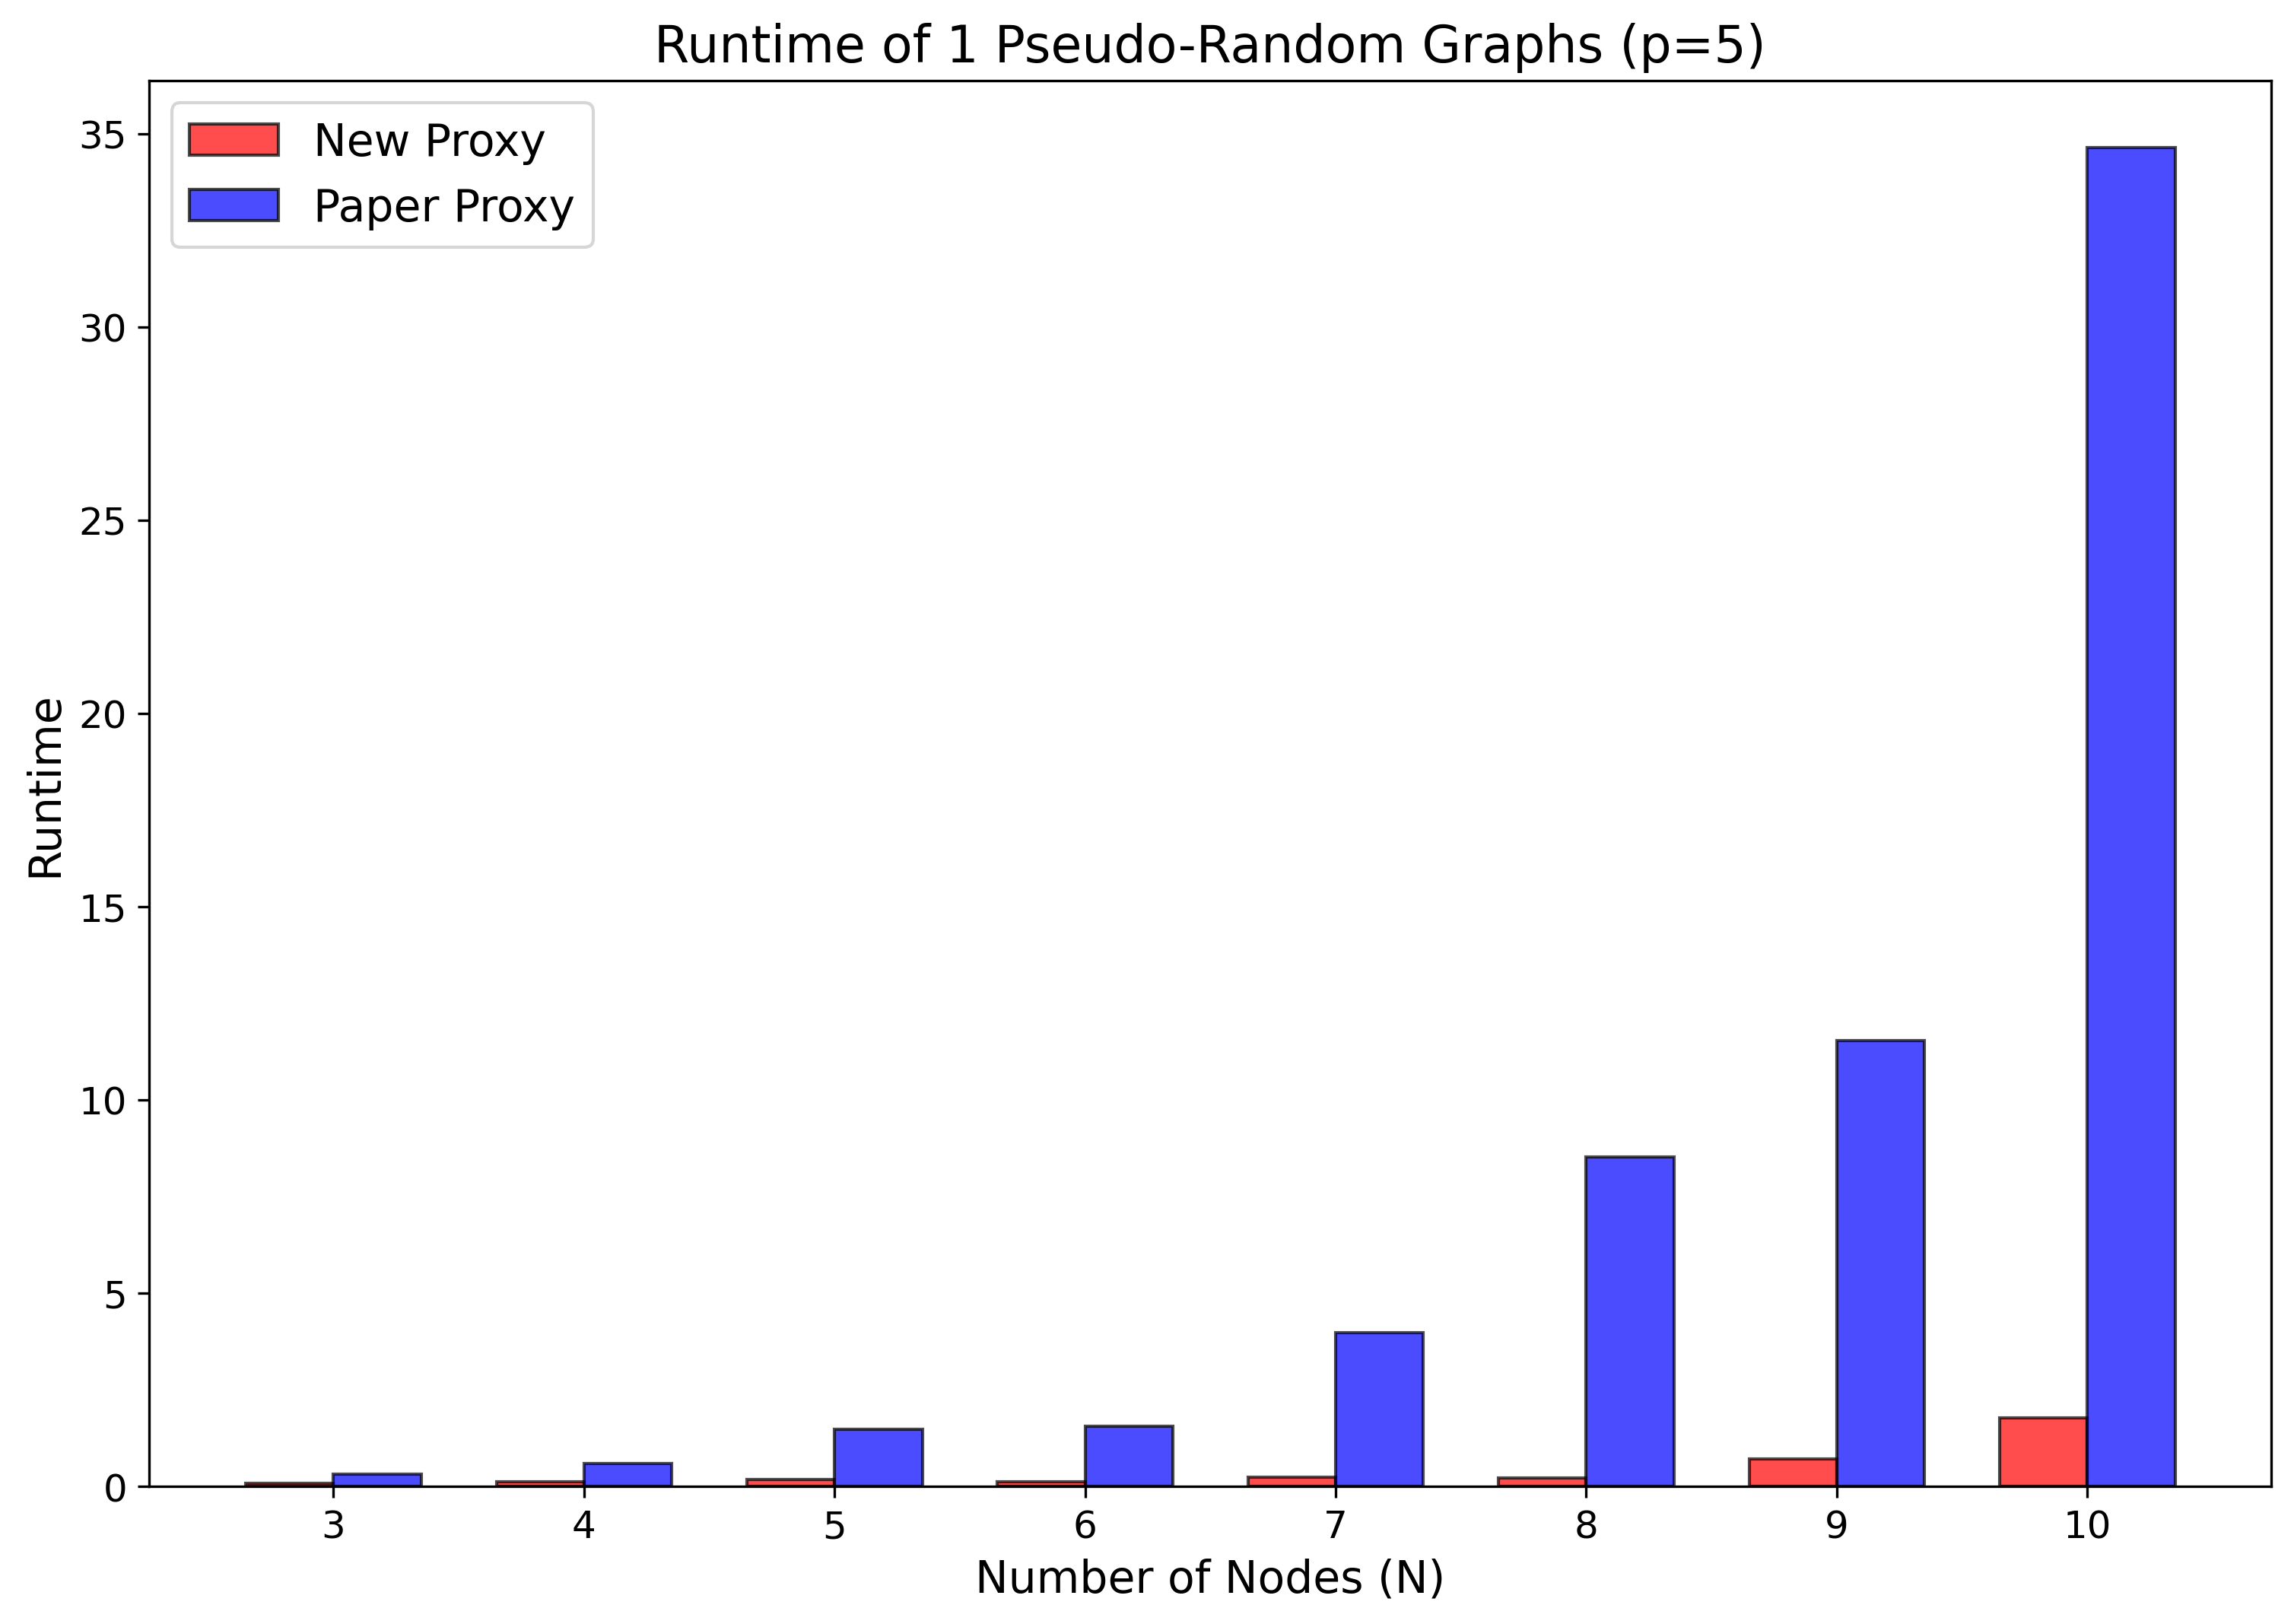

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import qokit.maxcut as mc
from QAOA_simulator import QAOA_run, get_simulator
import QAOA_proxy as qp
import QAOA_paper_proxy as qpp
import os  # データ保存に必要

# QAOAの層数
p = 5

runtime_new_proxy = []
runtime_paper_proxy = []

# 試行回数
T = 1

# 保存先ディレクトリを指定
save_dir = f"data_for_graphs_runtime_P={p}_T={T}"
os.makedirs(save_dir, exist_ok=True)

# Nを5から10まで変化させて計算
for N in range(3, 11):
    runtime_new_proxy_i = []
    runtime_paper_proxy_i = []

    for i in range(T):
        G = nx.erdos_renyi_graph(N, 0.5)
        ising_model = mc.get_maxcut_terms(G)
        sim = get_simulator(N, ising_model)

        init_gamma, init_beta = np.full((2, p), 0.1)

        result = qp.QAOA_proxy_run(G.number_of_edges(), N, p, init_gamma, init_beta)
        # `result` の中に `runtime` が存在するか確認
        if "runtime" in result:
            runtime = result["runtime"]
            # 結果をリストに追加
            runtime_new_proxy_i.append(runtime)
            print(f"New Proxy runtime for N={N}: {runtime}")
        else:
            print(f"Warning: 'runtime' not found for New Proxy with N={N}")

        np.save(f"{save_dir}/data_for_runtime_new_proxy_N={N}_G{i}.npy", runtime)

        result = qpp.QAOA_paper_proxy_run(G.number_of_edges(), N, p, init_gamma, init_beta)
        # `result` の中に `runtime` が存在するか確認
        if "runtime" in result:
            runtime = result["runtime"]
            # 結果をリストに追加
            runtime_paper_proxy_i.append(runtime)
            print(f"Paper Proxy runtime for N={N}: {runtime}")
        else:
            print(f"Warning: 'runtime' not found for Paper Proxy with N={N}")

        np.save(f"{save_dir}/data_for_runtime_paper_proxy_N={N}_G{i}.npy", runtime)

    # 各Nに対しての平均を計算
    if runtime_new_proxy_i:
        avg_runtime_new_proxy = np.mean(runtime_new_proxy_i)
        runtime_new_proxy.append(avg_runtime_new_proxy)
    if runtime_paper_proxy_i:
        avg_runtime_paper_proxy = np.mean(runtime_paper_proxy_i)
        runtime_paper_proxy.append(avg_runtime_paper_proxy)


# 棒グラフの作成
bar_width = 0.35  # バーの幅
index = np.arange(3, 11)  # x軸のインデックス

# runtime_new_proxy と runtime_paper_proxy のサイズが index のサイズと一致するように調整
if len(runtime_new_proxy) != len(index):
    runtime_new_proxy = runtime_new_proxy[:len(index)]
if len(runtime_paper_proxy) != len(index):
    runtime_paper_proxy = runtime_paper_proxy[:len(index)]

# グラフのサイズと解像度の設定（figsizeとdpiを調整）
plt.figure(figsize=(12, 8), dpi=300)

# 新しいプロキシの棒グラフ（枠を黒色に設定）
plt.bar(index - bar_width / 2, runtime_new_proxy, bar_width, color='red', alpha=0.7, label='New Proxy', edgecolor='black')

# 論文プロキシの棒グラフ（枠を黒色に設定）
plt.bar(index + bar_width / 2, runtime_paper_proxy, bar_width, color='blue', alpha=0.7, label='Paper Proxy', edgecolor='black')

# グラフの設定
plt.xlabel('Number of Nodes (N)', fontsize=14)  # 横軸のラベル
plt.ylabel('Runtime', fontsize=14)  # 縦軸のラベル
plt.title(f'Runtime of {T} Pseudo-Random Graphs (p={p})', fontsize=16)  # 題名
plt.xticks(index, fontsize=12)  # x軸の目盛りのサイズ
plt.yticks(fontsize=12)  # y軸の目盛りのサイズ
plt.legend(prop={'size': 14})

# グラフをファイルとして保存
plt.savefig(f"{save_dir}/Runtime of {T} Pseudo-Random Graphs (P={p}).png", format='png', bbox_inches='tight')

# グラフの表示
plt.show()